In [42]:
import pandas as pd
import numpy as np
import seaborn as sns


In [43]:
# Reading the dataset
data = pd.read_csv('/content/drive/MyDrive/ExcelRDataset/delivery_time.csv')
data

data.rename(columns = {'Sorting Time':'SortingTime'},inplace=True)
data.rename(columns = {'Delivery Time':'DeliveryTime'},inplace=True)
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [44]:
# check the null values
data.info()

data.isnull().sum()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


DeliveryTime    0
SortingTime     0
dtype: int64

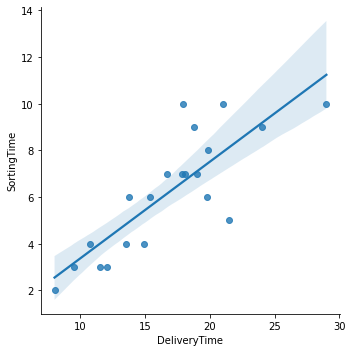

In [41]:
# check the correlation between independent and dependent variables
sns.lmplot(x='DeliveryTime',y='SortingTime',data=data)

In [45]:
# find the corr between independent and dependent variables
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [46]:
# select the independent and dependent variables
X = data.iloc[:,0].values
y = data.iloc[:,-1].values
data.shape


(21, 2)

In [57]:
# splitting the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)


In [48]:
# fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))   


LinearRegression()

In [73]:
# predict the model
y_pred = regressor.predict(X_test.reshape(-1,1))
regressor.predict([[21.00]])


array([[8.16289199]])

In [77]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
r_squared = r2_score(y_test,y_pred)
print('R-Squared: ',r_squared)
mape = mean_absolute_percentage_error(y_test,y_pred)
print('MAPE:',mape)


R-Squared:  0.8596735708947695
MAPE: 0.14751149020443582


In [70]:
import statsmodels.formula.api as smf
model=smf.ols("SortingTime~DeliveryTime",data=data).fit()
model.rsquared


0.682271474841723

In [67]:
test_value = pd.Series([21.00])
test_df = pd.DataFrame(test_value,columns=['DeliveryTime'])
model_pred = model.predict(test_df)
model_pred

0    7.931943
dtype: float64